# GRIP TASK 6: Prediction using Decision Tree Algorithm

## Author: Rahul Bajaj

1. Create the Decision Tree classifier and visualize it graphically. 
2. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

## Why decision Tree

<img src="9a299e65388a9609d3d567ee3cf7a6c5.png" width="400"> Photo: Google

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

## Reading the dataset

In [2]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Categorical data to numerical data

## Checking for null values

In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## split our data based on independent variable(X) and dependent variable(y)

In [5]:
X=data.drop(columns=['species'])
y=data['species']

In [6]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


## Splitting our model into training and testing dataset for model training

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Model Building: implementing our classifier based on Decision Tree

In [9]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Our feature_name and class_name

In [10]:
feature_name=list(X.columns)
class_name=list(y.unique())
print(feature_name)
print(class_name)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
['setosa', 'versicolor', 'virginica']


## Plotting our tree

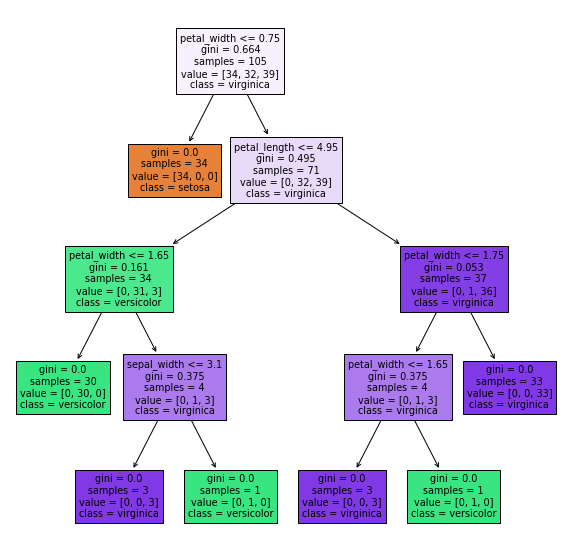

In [11]:
plt.figure(figsize=(10,10))
fig=tree.plot_tree(dt,
                   feature_names=feature_name,
                   class_names=class_name,
                   filled=True)

## Score accuracy

In [12]:
dt.score(X_test,y_test)

0.9777777777777777

## Checking for a table value
our prediction is correct

In [13]:
data.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [14]:
y_pred=dt.predict(([[5.1,3.5,1.4,0.2]]))
y_pred

array(['setosa'], dtype=object)

## Feeding new data to our classifier

In [15]:
#when petal width = 0.65 we should get setosa
y_pred=dt.predict(([[1,1,1,0.65]]))
y_pred

array(['setosa'], dtype=object)

In [16]:
#when petal width > 0.75, if petal_length < 4.95 then left side of graph
y_pred=dt.predict(([[1,1,4,1]]))
y_pred

array(['versicolor'], dtype=object)

In [17]:
#when petal width > 0.75, if petal_length > 4.95 then right side of graph

y_pred=dt.predict(([[1,1,5,1]]))
y_pred

array(['virginica'], dtype=object)

## Result

Here we have feed new data to the classifier and it is able to predict the right class accordingly.